In [45]:
# https://www.kaggle.com/uciml/mushroom-classification

# Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

# gill-size: broad=b,narrow=n

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

import tensorflow as tf
from tensorflow import keras as keras
from keras.regularizers import l2

In [246]:
data = pd.read_csv('./mushrooms.csv')

In [247]:
data.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [279]:
data.shape

(8124, 22)

In [280]:
# missing data
data.isnull().sum() 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

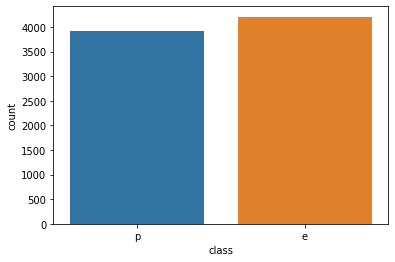

In [250]:
# trujace vs jadalne
sns.countplot(data['class'])


In [234]:
# sns.pairplot(data['veil-type'])
# plt.show()

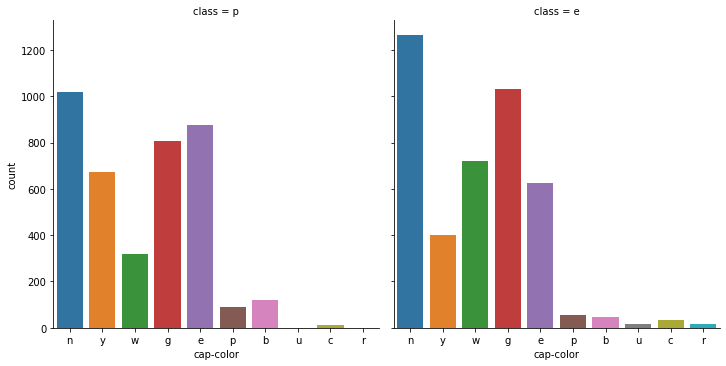

In [109]:
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

g = sns.catplot(x="cap-color",col="class",data=data, kind="count");

In [251]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])


X = data.drop(['class'] , axis = 1)
y = data['class']

<AxesSubplot:>

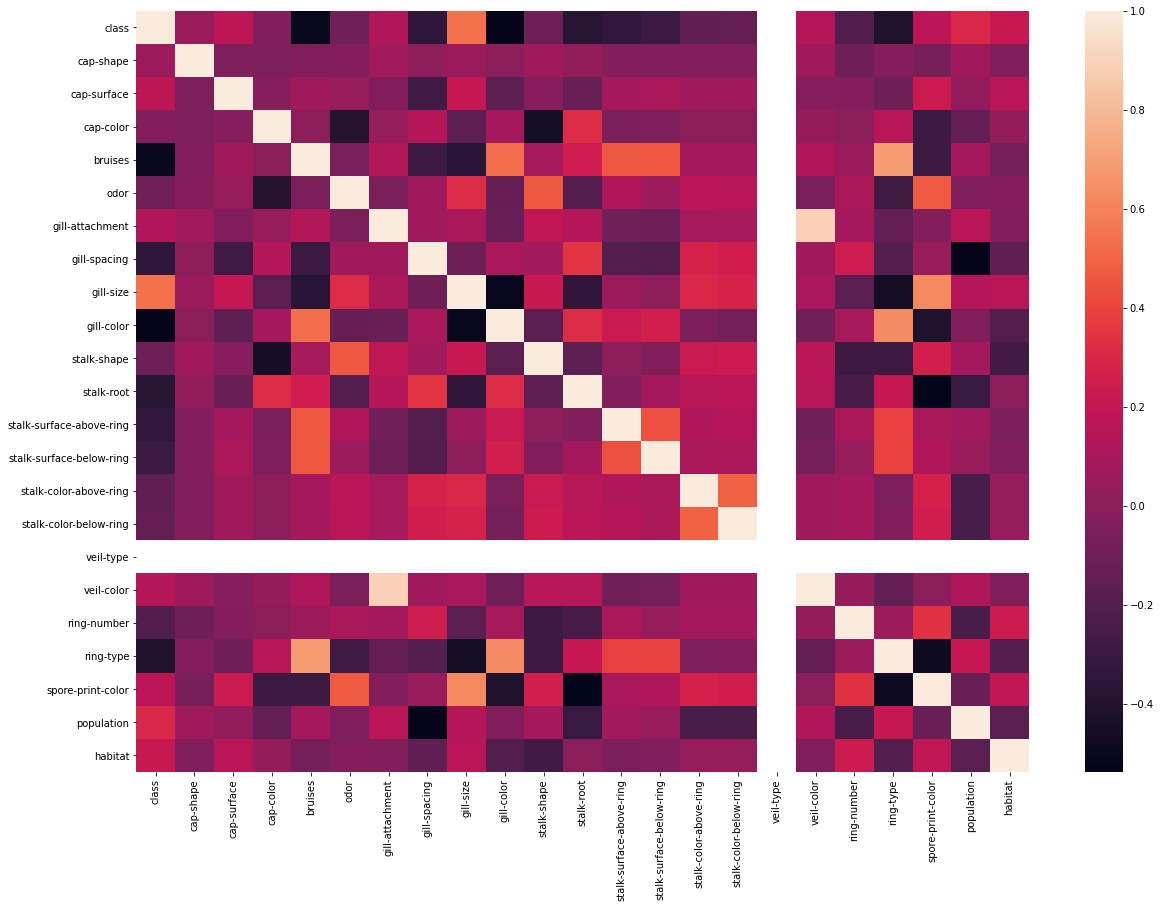

In [252]:
plt.subplots(figsize=(20, 14))
sns.heatmap(data.corr())

In [253]:
data = data.drop(columns=["veil-type"])

In [277]:
data.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


In [281]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3,test_size = 0.3)

In [282]:
X_train.shape

(5686, 22)

In [ ]:
X_test.shape

In [296]:
# linear regression
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test,y_test)

0.7368616020274965

In [297]:
# svc
svc = svm.SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9889253486464314

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

history = History()
model = Sequential()
model.add(Dense(100,  activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, 
          y_train,
          validation_data= (X_test, y_test),
          batch_size=32,
          epochs=80,
          callbacks=[history])


Epoch 1/80
178/178 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.6731 - val_loss: 0.4357 - val_accuracy: 0.8470
Epoch 2/80
178/178 [==============================] - 0s 949us/step - loss: 0.3724 - accuracy: 0.8681 - val_loss: 0.3060 - val_accuracy: 0.8905
Epoch 3/80
178/178 [==============================] - 0s 938us/step - loss: 0.2887 - accuracy: 0.9101 - val_loss: 0.2553 - val_accuracy: 0.9122
Epoch 4/80
178/178 [==============================] - 0s 1000us/step - loss: 0.2479 - accuracy: 0.9221 - val_loss: 0.2265 - val_accuracy: 0.9221
Epoch 5/80
178/178 [==============================] - 0s 943us/step - loss: 0.2290 - accuracy: 0.9284 - val_loss: 0.1948 - val_accuracy: 0.9356
Epoch 6/80
178/178 [==============================] - 0s 943us/step - loss: 0.2038 - accuracy: 0.9356 - val_loss: 0.1674 - val_accuracy: 0.9475
Epoch 7/80
178/178 [==============================] - 0s 944us/step - loss: 0.1800 - accuracy: 0.9467 - val_loss: 0.1471 - val_accuracy: 

178/178 [==============================] - 0s 972us/step - loss: 0.0716 - accuracy: 0.9877 - val_loss: 0.0562 - val_accuracy: 0.9902
Epoch 58/80
178/178 [==============================] - 0s 949us/step - loss: 0.0681 - accuracy: 0.9887 - val_loss: 0.0562 - val_accuracy: 0.9902
Epoch 59/80
178/178 [==============================] - 0s 943us/step - loss: 0.0717 - accuracy: 0.9875 - val_loss: 0.0565 - val_accuracy: 0.9902
Epoch 60/80
178/178 [==============================] - 0s 944us/step - loss: 0.0696 - accuracy: 0.9870 - val_loss: 0.0563 - val_accuracy: 0.9902
Epoch 61/80
178/178 [==============================] - 0s 938us/step - loss: 0.0695 - accuracy: 0.9882 - val_loss: 0.0562 - val_accuracy: 0.9902
Epoch 62/80
178/178 [==============================] - 0s 955us/step - loss: 0.0709 - accuracy: 0.9870 - val_loss: 0.0570 - val_accuracy: 0.9902
Epoch 63/80
178/178 [==============================] - 0s 960us/step - loss: 0.0719 - accuracy: 0.9877 - val_loss: 0.0563 - val_accuracy: 0.99

In [213]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

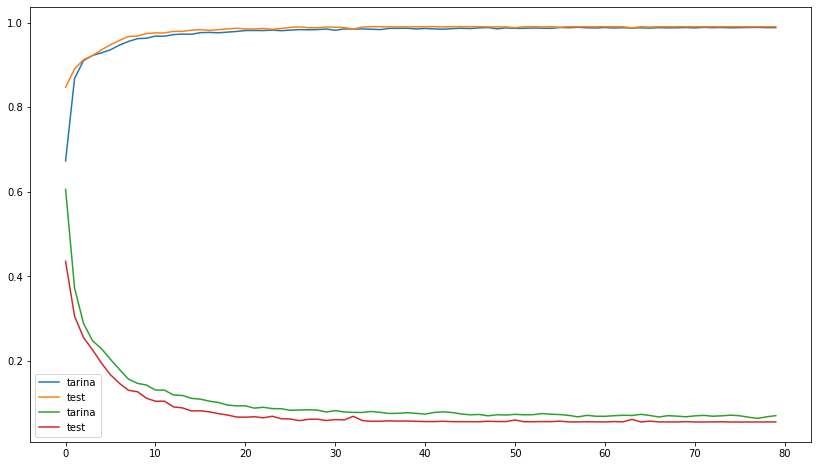

In [225]:
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()

import matplotlib.pyplot as plt
plt.subplots(figsize=(14, 8))
# sns.heatmap(data.corr())
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [226]:
preds=model.predict(X_test)
preds = pd.DataFrame(preds)

In [227]:
preds[0] = (preds[0] > .5).astype(int)
metrics.accuracy_score(y_true= y_test, y_pred= preds)

0.9901558654634947